In [6]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import DepthwiseConv1D
from tensorflow.keras.layers import Dropout, concatenate,Conv1DTranspose
from tensorflow import keras
from sklearn.utils import shuffle
from tabulate import tabulate
from matplotlib.backends.backend_pdf import PdfPages
import tensorflow.keras.backend as K
import pickle
from tensorflow.keras.callbacks import EarlyStopping
import time
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [8]:
normal_x = pd.read_excel(r"C:\Users\fe73yap\Downloads\Result_spectrum_Without_noise.xlsx")

In [9]:
normal_x

,0,1,2,3,4,5,6,7,8,9,...,Unnamed: 1014,Unnamed: 1015,Unnamed: 1016,Unnamed: 1017,Unnamed: 1018,Unnamed: 1019,Unnamed: 1020,Unnamed: 1021,Unnamed: 1022,Unnamed: 1023
0,9.191711e-03,2.250514e-02,4.151438e-02,6.825745e-02,0.105317,0.155892,0.223855,0.313778,0.430916,0.581141,...,0.041563,0.041309,0.041056,0.040805,0.040555,0.040307,0.040060,0.039815,0.039571,0.039329
1,9.191711e-03,2.248200e-02,4.143490e-02,6.807459e-02,0.104965,0.155280,0.222859,0.312233,0.428603,0.577776,...,0.017312,0.017194,0.017077,0.016961,0.016845,0.016730,0.016616,0.016503,0.016391,0.016279
2,6.113568e-06,2.202875e-05,6.190816e-05,1.579792e-04,0.000380,0.000875,0.001933,0.004104,0.008387,0.016505,...,0.007779,0.007723,0.007667,0.007612,0.007558,0.007503,0.007449,0.007396,0.007343,0.007290
3,7.138148e-09,3.908690e-08,1.735429e-07,7.052149e-07,0.000003,0.000010,0.000032,0.000102,0.000303,0.000850,...,1.053647,1.052117,1.050590,1.049064,1.047541,1.046021,1.044502,1.042986,1.041472,1.039961
4,6.113568e-06,2.195116e-05,6.156491e-05,1.569126e-04,0.000378,0.000868,0.001916,0.004065,0.008304,0.016331,...,0.951354,0.949132,0.946915,0.944703,0.942497,0.940296,0.938100,0.935910,0.933725,0.931546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6.113568e-06,2.199572e-05,6.175711e-05,1.574983e-04,0.000379,0.000872,0.001925,0.004086,0.008347,0.016421,...,0.325941,0.325097,0.324255,0.323416,0.322579,0.321744,0.320911,0.320081,0.319253,0.318428
9996,2.459414e-02,5.746451e-02,1.009221e-01,1.577300e-01,0.231129,0.324844,0.443067,0.590403,0.771788,0.992358,...,0.982250,0.980347,0.978449,0.976555,0.974665,0.972779,0.970898,0.969022,0.967149,0.965281
9997,7.138148e-09,3.907375e-08,1.734580e-07,7.048118e-07,0.000003,0.000010,0.000032,0.000102,0.000303,0.000849,...,0.607563,0.606526,0.605492,0.604459,0.603429,0.602401,0.601376,0.600352,0.599331,0.598311
9998,2.395363e-04,7.043694e-04,1.583145e-03,3.200237e-03,0.006095,0.011138,0.019680,0.033754,0.056307,0.091456,...,0.425731,0.424385,0.423043,0.421704,0.420371,0.419041,0.417716,0.416394,0.415077,0.413764


In [10]:
#normal_x = normal_x.to_numpy()

In [11]:
x1= np.linspace(0, 10, num = 1024)

In [12]:
# plt.plot(x1,normal_x[0,:])

In [13]:
noise_x = pd.read_excel(r"C:\Users\fe73yap\Downloads\Result_spectrum_only_noise.xlsx")

In [14]:
noise_x

,0,1,2,3,4,5,6,7,8,9,...,Unnamed: 1014,Unnamed: 1015,Unnamed: 1016,Unnamed: 1017,Unnamed: 1018,Unnamed: 1019,Unnamed: 1020,Unnamed: 1021,Unnamed: 1022,Unnamed: 1023
0,0,3,2,1,1,1,0,2,2,0,...,1,1,0,1,1,0,2,1,0,4
1,8,4,6,10,1,3,7,3,5,2,...,3,7,5,5,6,3,2,8,2,5
2,4,5,3,6,5,4,3,1,4,5,...,1,5,3,3,4,3,6,2,4,9
3,4,4,5,0,3,6,3,6,4,7,...,3,2,4,2,1,3,5,4,5,3
4,1,0,1,1,6,2,4,2,3,0,...,1,1,2,3,1,2,2,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,4,6,6,1,0,2,3,1,1,...,7,2,0,5,2,2,3,1,5,2
9996,1,4,1,1,1,3,2,1,1,0,...,1,1,1,2,0,3,3,1,1,2
9997,0,0,1,1,4,2,3,1,0,0,...,1,1,0,0,2,1,1,2,1,3
9998,4,2,4,2,2,5,3,2,0,1,...,4,2,1,1,3,2,2,5,0,5


In [15]:
#split noisy data
x_train_noise,x_test_noise=train_test_split(noise_x,test_size=0.2,random_state=1)

In [16]:
#split noisy data
x_train_noise,x_val_noise = train_test_split(x_train_noise,test_size=0.25,random_state=1)

In [17]:
#read excel file as data_y
data_y = pd.read_excel(r'C:\Users\fe73yap\Downloads\results_spectrum_new_6_16_22_1.xlsx',sheet_name = 'sheet_results',usecols ="A:F")

In [18]:
data_y

,a1,a2,a3,t1,t2,t3
0,10.320614,89.679386,0.000000,0.921415,1.593294,0.000000
1,25.109931,74.890069,0.000000,0.610361,1.429725,0.000000
2,23.134267,76.865733,0.000000,0.767939,1.357821,0.000000
3,27.298894,29.467112,43.233994,0.796112,1.462774,6.820105
4,14.633035,62.213217,23.153748,0.070433,3.488250,5.276859
...,...,...,...,...,...,...
9995,54.511022,28.639397,16.849581,0.425365,2.559654,4.481049
9996,37.667850,40.850361,21.481790,0.605700,2.028760,5.779933
9997,37.836046,39.848300,22.315654,0.637291,2.317398,6.857984
9998,34.955644,65.044356,0.000000,0.662114,3.085633,0.000000


In [19]:
#please do that as it is
data_y_abundances = data_y[['a1','a2','a3']]
data_y_abundances

,a1,a2,a3
0,10.320614,89.679386,0.000000
1,25.109931,74.890069,0.000000
2,23.134267,76.865733,0.000000
3,27.298894,29.467112,43.233994
4,14.633035,62.213217,23.153748
...,...,...,...
9995,54.511022,28.639397,16.849581
9996,37.667850,40.850361,21.481790
9997,37.836046,39.848300,22.315654
9998,34.955644,65.044356,0.000000


In [20]:
#please do that as it is
data_y_lifetime = data_y [['t1','t2','t3']]
data_y_lifetime

,t1,t2,t3
0,0.921415,1.593294,0.000000
1,0.610361,1.429725,0.000000
2,0.767939,1.357821,0.000000
3,0.796112,1.462774,6.820105
4,0.070433,3.488250,5.276859
...,...,...,...
9995,0.425365,2.559654,4.481049
9996,0.605700,2.028760,5.779933
9997,0.637291,2.317398,6.857984
9998,0.662114,3.085633,0.000000


In [21]:
#please do that as it is
data_y_abundances = data_y_abundances.div(100)

In [22]:
#please do that as it is
data_y_lifetime_t1 = (data_y_lifetime [['t1']]).div(1.0)

In [23]:
#please do that as it is
data_y_lifetime_t2 = (data_y_lifetime [['t2']]).div(4.0)

In [24]:
#please do that as it is
data_y_lifetime_t3 = (data_y_lifetime [['t3']]).div(7.0)

In [25]:
#please do that as it is
data_y_lifetime_new = pd.concat([data_y_lifetime_t1,data_y_lifetime_t2,data_y_lifetime_t3 ], axis = 1)
data_y_lifetime_new

,t1,t2,t3
0,0.921415,0.398323,0.000000
1,0.610361,0.357431,0.000000
2,0.767939,0.339455,0.000000
3,0.796112,0.365694,0.974301
4,0.070433,0.872062,0.753837
...,...,...,...
9995,0.425365,0.639914,0.640150
9996,0.605700,0.507190,0.825705
9997,0.637291,0.579349,0.979712
9998,0.662114,0.771408,0.000000


In [26]:
#please do that as it is
data_Y = pd.concat([data_y_abundances,data_y_lifetime_new], axis = 1)

In [27]:
data_Y

,a1,a2,a3,t1,t2,t3
0,0.103206,0.896794,0.000000,0.921415,0.398323,0.000000
1,0.251099,0.748901,0.000000,0.610361,0.357431,0.000000
2,0.231343,0.768657,0.000000,0.767939,0.339455,0.000000
3,0.272989,0.294671,0.432340,0.796112,0.365694,0.974301
4,0.146330,0.622132,0.231537,0.070433,0.872062,0.753837
...,...,...,...,...,...,...
9995,0.545110,0.286394,0.168496,0.425365,0.639914,0.640150
9996,0.376678,0.408504,0.214818,0.605700,0.507190,0.825705
9997,0.378360,0.398483,0.223157,0.637291,0.579349,0.979712
9998,0.349556,0.650444,0.000000,0.662114,0.771408,0.000000


In [28]:
#split normal decay trace
x_train,x_test,y_train,y_test=train_test_split(normal_x,data_Y,test_size=0.2,random_state=1)

In [29]:
#split training data as training and validation
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.25,random_state=1)

In [30]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,Unnamed: 1014,Unnamed: 1015,Unnamed: 1016,Unnamed: 1017,Unnamed: 1018,Unnamed: 1019,Unnamed: 1020,Unnamed: 1021,Unnamed: 1022,Unnamed: 1023
4495,6.113568e-06,2.204328e-05,6.197508e-05,1.581935e-04,0.000381,0.000877,0.001936,0.004112,0.008405,0.016543,...,1.197027,1.195155,1.193286,1.191420,1.189557,1.187698,1.185841,1.183988,1.182138,1.180291
6470,2.395363e-04,7.045459e-04,1.583840e-03,3.202095e-03,0.006100,0.011147,0.019697,0.033786,0.056363,0.091553,...,0.802309,0.800247,0.798190,0.796139,0.794092,0.792052,0.790016,0.787985,0.785960,0.783940
2221,4.972487e-02,1.121194e-01,1.898401e-01,2.858734e-01,0.403516,0.546335,0.718112,0.922753,1.164188,1.446238,...,0.758848,0.756901,0.754959,0.753022,0.751090,0.749162,0.747240,0.745323,0.743410,0.741503
7686,7.138148e-09,3.909851e-08,1.736181e-07,7.055725e-07,0.000003,0.000010,0.000032,0.000102,0.000303,0.000851,...,0.303319,0.302255,0.301195,0.300138,0.299085,0.298036,0.296990,0.295948,0.294910,0.293875
9419,9.191711e-03,2.245447e-02,4.134472e-02,6.787619e-02,0.104598,0.154668,0.221900,0.310796,0.426523,0.574845,...,2.492838,2.488186,2.483543,2.478908,2.474283,2.469666,2.465058,2.460459,2.455869,2.451287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7586,6.113568e-06,2.194230e-05,6.151264e-05,1.567195e-04,0.000377,0.000866,0.001912,0.004056,0.008283,0.016285,...,0.162155,0.161720,0.161287,0.160856,0.160425,0.159995,0.159567,0.159140,0.158714,0.158289
8288,2.395363e-04,7.020657e-04,1.574113e-03,3.176158e-03,0.006041,0.011026,0.019463,0.033352,0.055589,0.090210,...,0.190237,0.189675,0.189115,0.188556,0.187999,0.187443,0.186889,0.186337,0.185787,0.185238
9718,7.138148e-09,3.880982e-08,1.717641e-07,6.967997e-07,0.000003,0.000009,0.000032,0.000100,0.000297,0.000833,...,0.318832,0.318280,0.317729,0.317178,0.316629,0.316081,0.315534,0.314988,0.314442,0.313898
7562,2.395363e-04,7.044788e-04,1.583571e-03,3.201362e-03,0.006098,0.011143,0.019690,0.033773,0.056340,0.091512,...,0.175308,0.174635,0.173964,0.173295,0.172630,0.171966,0.171306,0.170648,0.169992,0.169339


In [31]:
x_train_noise

,0,1,2,3,4,5,6,7,8,9,...,Unnamed: 1014,Unnamed: 1015,Unnamed: 1016,Unnamed: 1017,Unnamed: 1018,Unnamed: 1019,Unnamed: 1020,Unnamed: 1021,Unnamed: 1022,Unnamed: 1023
4495,1,2,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
6470,3,4,4,0,4,2,3,1,4,6,...,3,5,2,0,2,3,0,0,1,2
2221,0,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,0,0,0,0,0
7686,0,1,1,0,0,2,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
9419,1,3,5,6,2,2,2,1,9,5,...,2,7,3,1,4,7,3,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7586,0,1,0,1,0,0,1,1,0,0,...,0,0,2,2,1,2,0,0,0,0
8288,2,0,0,2,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
9718,2,3,2,4,3,0,2,0,3,1,...,2,2,2,2,0,0,0,0,3,2
7562,2,1,0,0,1,1,0,0,1,2,...,1,2,3,1,2,1,2,0,0,2


In [32]:
x_train_noise = x_train_noise.to_numpy()
#x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_test_noise = x_test_noise.to_numpy()
x_val = x_val.to_numpy()
x_val_noise = x_val_noise.to_numpy()

In [33]:
#add noise to normal data
noisy_x_train = np.add(x_train, x_train_noise)

In [34]:
noisy_x_train

,0,1,2,3,4,5,6,7,8,9,...,Unnamed: 1014,Unnamed: 1015,Unnamed: 1016,Unnamed: 1017,Unnamed: 1018,Unnamed: 1019,Unnamed: 1020,Unnamed: 1021,Unnamed: 1022,Unnamed: 1023
4495,1.000006e+00,2.000022,0.000062,1.581935e-04,0.000381,0.000877,0.001936,1.004112,0.008405,0.016543,...,1.197027,1.195155,2.193286,1.191420,1.189557,1.187698,1.185841,2.183988,2.182138,1.180291
6470,3.000240e+00,4.000705,4.001584,3.202095e-03,4.006100,2.011147,3.019697,1.033786,4.056363,6.091553,...,3.802309,5.800247,2.798190,0.796139,2.794092,3.792052,0.790016,0.787985,1.785960,2.783940
2221,4.972487e-02,1.112119,0.189840,2.858734e-01,0.403516,0.546335,0.718112,1.922753,1.164188,1.446238,...,1.758848,1.756901,0.754959,1.753022,0.751090,0.749162,0.747240,0.745323,0.743410,0.741503
7686,7.138148e-09,1.000000,1.000000,7.055725e-07,0.000003,2.000010,0.000032,0.000102,1.000303,0.000851,...,1.303319,0.302255,0.301195,1.300138,0.299085,0.298036,0.296990,0.295948,0.294910,1.293875
9419,1.009192e+00,3.022454,5.041345,6.067876e+00,2.104598,2.154668,2.221900,1.310796,9.426523,5.574845,...,4.492838,9.488186,5.483543,3.478908,6.474283,9.469666,5.465058,3.460459,6.455869,5.451287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7586,6.113568e-06,1.000022,0.000062,1.000157e+00,0.000377,0.000866,1.001912,1.004056,0.008283,0.016285,...,0.162155,0.161720,2.161287,2.160856,1.160425,2.159995,0.159567,0.159140,0.158714,0.158289
8288,2.000240e+00,0.000702,0.001574,2.003176e+00,1.006041,0.011026,0.019463,0.033352,1.055589,0.090210,...,0.190237,1.189675,0.189115,0.188556,0.187999,0.187443,0.186889,1.186337,0.185787,0.185238
9718,2.000000e+00,3.000000,2.000000,4.000001e+00,3.000003,0.000009,2.000032,0.000100,3.000297,1.000833,...,2.318832,2.318280,2.317729,2.317178,0.316629,0.316081,0.315534,0.314988,3.314442,2.313898
7562,2.000240e+00,1.000704,0.001584,3.201362e-03,1.006098,1.011143,0.019690,0.033773,1.056340,2.091512,...,1.175308,2.174635,3.173964,1.173295,2.172630,1.171966,2.171306,0.170648,0.169992,2.169339


In [ ]:
x_train

In [ ]:
x_train_noise

In [ ]:
noisy_x_train

In [35]:
# add noise to the normal
noisy_x_test = np.add(x_test, x_test_noise)

In [36]:
noisy_x_test.shape

(2000, 1024)

In [37]:
#add noise to the normal data
noisy_x_val = np.add(x_val, x_val_noise)

In [38]:
x_val_noise

array([[1, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 7, 4, ..., 4, 5, 0],
       [2, 3, 7, ..., 2, 4, 2],
       [2, 1, 1, ..., 1, 1, 0]], dtype=int64)

In [39]:
noisy_x_val

array([[1.00919171e+00, 2.25044750e-02, 1.04151218e+00, ...,
        1.17016389e+00, 1.69401956e-01, 1.68643432e-01],
       [4.97248734e-02, 1.11230451e+00, 1.19043439e+00, ...,
        1.00065125e+00, 6.45353884e-04, 1.00063951e+00],
       [2.45941440e-02, 5.74106526e-02, 1.00743285e-01, ...,
        4.56460585e-01, 4.55027456e-01, 4.53598826e-01],
       ...,
       [5.00023954e+00, 7.00070203e+00, 4.00157398e+00, ...,
        4.00120424e+00, 5.00119452e+00, 1.18487275e-03],
       [2.00218749e+00, 3.00564906e+00, 7.01107929e+00, ...,
        2.12989896e+00, 4.12943036e+00, 2.12896345e+00],
       [2.00023954e+00, 1.00070375e+00, 1.00158071e+00, ...,
        1.82155117e+00, 1.81992621e+00, 8.18304602e-01]])

In [40]:
noisy_x_train.shape

(6000, 1024)

In [41]:
#convert numpy array
#noisy_x_train = noisy_x_train.to_numpy()
#noisy_x_test = noisy_x_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
#noisy_x_val = noisy_x_val.to_numpy()
y_val=y_val.to_numpy()
#x_train = x_train.to_numpy()
#x_test = x_test.to_numpy()
#x_val = x_val.to_numpy()

In [42]:
#normalize the training, validation and test data
X_train = preprocessing.normalize(x_train)
X_test = preprocessing.normalize(x_test)
X_val = preprocessing.normalize(x_val)

In [43]:
noisy_X_train = preprocessing.normalize(noisy_x_train)
noisy_X_test = preprocessing.normalize(noisy_x_test)


In [44]:
noisy_X_val = preprocessing.normalize(noisy_x_val)

In [45]:
Y_train = preprocessing.normalize(y_train)
Y_test = preprocessing.normalize(y_test)
Y_val = preprocessing.normalize(y_val)

In [46]:
#normalize the training and validation data
#min_max=MinMaxScaler()
#X_train=min_max.fit_transform(x_train)
#X_test=min_max.fit_transform(x_test)
#X_val=min_max.fit_transform(x_val)


In [47]:
x1 = np.linspace(0,10, num = 1024)

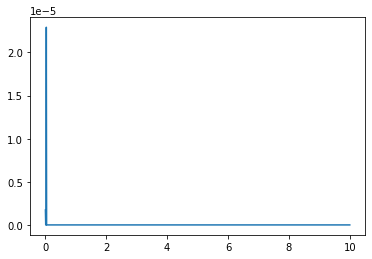

In [65]:
#plt.plot(x1, x_train[1,:])
#plt.plot(x1, X_test[1,:])
b = noisy_X_test[1,:]
b[b > 7] = 0
plt.plot(x1, b)
#plt.plot(x1, normal_x[1,:])

In [59]:
noisy_X_test[1,:]

array([1.72995020e-06, 7.22714763e-03, 7.23344018e-03, ...,
       4.80659135e-03, 4.79422147e-03, 4.78188342e-03])

In [66]:
b

array([1.7299502e-06, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00])

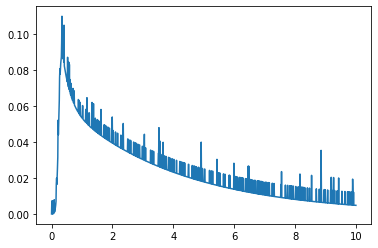

In [55]:
plt.plot(x1,noisy_X_test[1,:] )

In [ ]:
#noisy_X_train = min_max.fit_transform(noisy_x_train)
#noisy_X_test = min_max.fit_transform(noisy_x_test)
#noisy_X_val = min_max.fit_transform(noisy_x_val)


In [ ]:
#noisy_X_train.isnull().any()

In [ ]:
#normalize martrices
#trans_out = MinMaxScaler()
#trans_out.fit(y_train)
#Y_train = trans_out.transform(y_train)
#Y_test = trans_out.transform(y_test)
#Y_val = trans_out.transform(y_val)

In [ ]:
noisy_X_test.shape

In [ ]:
#define validation data
valid_data = (noisy_X_test,X_test/0.01)

In [ ]:
X_test

In [ ]:
n_inputs = 1024

In [ ]:
# build unet model
inputs = tf.keras.layers.Input((1024,1))
c1 = tf.keras.layers.Conv1D(64,7, activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(inputs)
c1 = BatchNormalization()(c1)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv1D(64,7, activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c1)
c1 = BatchNormalization()(c1)
p1 = tf.keras.layers.MaxPooling1D(pool_size =2)(c1)


c2 = tf.keras.layers.Conv1D(128,7, activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p1)
c2 = BatchNormalization()(c2)
c2 = tf.keras.layers.Dropout(0.2)(c2)
c2 = tf.keras.layers.Conv1D(128,7, activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c2)
c2 = BatchNormalization()(c2)
p2 = tf.keras.layers.MaxPooling1D(pool_size = 2)(c2)

c3 = tf.keras.layers.Conv1D(256,7, activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p2)
c3 = BatchNormalization()(c3)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv1D(256,7, activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c3)
c3 = BatchNormalization()(c3)
p3 = tf.keras.layers.MaxPooling1D(pool_size = 2)(c3)


c4 = tf.keras.layers.Conv1D(512,7, activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p3)
c4 = BatchNormalization()(c4)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv1D(512,7, activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c4)
c4 = BatchNormalization()(c4)


#Expansive path
u6 = Conv1DTranspose(256,2, strides = 2, padding = 'same')(c4)
u6 = concatenate ([u6,c3])
c6 = Conv1D(256,7, activation = 'relu', kernel_initializer = 'he_normal', padding = 'same' )(u6)
c6 = BatchNormalization()(c6)
c6 = Dropout(0.2)(c6)
c6 = Conv1D(256,7, activation = 'relu', kernel_initializer = 'he_normal', padding = 'same' )(c6)
c6 = BatchNormalization()(c6)

u7 = Conv1DTranspose(128,2, strides = 2, padding = 'same')(c6)
#u7 = concatenate ([u7,c2])
c7 = Conv1D(128,7, activation = 'relu', kernel_initializer = 'he_normal', padding = 'same' )(u7)
c7 = BatchNormalization()(c7)
c7 = Dropout(0.2)(c7)
c7 = Conv1D(128,7, activation = 'relu', kernel_initializer = 'he_normal', padding = 'same' )(c7)
c7 = BatchNormalization()(c7)


u8 = Conv1DTranspose(64,2, strides = 2, padding = 'same')(c7)
#u8 = concatenate ([u8,c2])
c8 = Conv1D(64,7, activation = 'relu', kernel_initializer = 'he_normal', padding = 'same' )(u8)
c8 = BatchNormalization()(c8)
c8 = Dropout(0.2)(c8)
c8 = Conv1D(64,7, activation = 'relu', kernel_initializer = 'he_normal', padding = 'same' )(c8)
#c8 = Conv1D(64,3, activation = 'relu', kernel_initializer = 'he_normal', padding = 'same' )(c8)
#c8 = Conv1D(64,1, activation = 'relu', kernel_initializer = 'he_normal', padding = 'same' )(c8)
c8 = tf.keras.layers.DepthwiseConv1D(1, depth_multiplier = 2, activation = 'relu',depthwise_initializer='he_normal', padding = 'same' )(c8)

c8 = BatchNormalization()(c8)




outputs = Conv1D (1,1, activation = 'LeakyReLU')(c8)

model = Model (inputs = [inputs], outputs = [outputs])
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile (optimizer = opt,loss = 'mse')

In [ ]:
tf.version.VERSION

In [ ]:
#checkpointer = tf.keras.callbacks.ModelCheckpoint('U_net_short_6_17_22_1.h5', verbose =1 , save_best_only = True )

In [ ]:
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(noisy_X_train, X_train/0.01, epochs = 1000, batch_size = 32, verbose = 1, validation_data = valid_data)

In [ ]:
model.save('u_net_short_denoiser_7_15_depthwise.h5')

In [33]:
model = load_model('u_net_short_denoiser_7_15_depthwise.h5')

In [5]:
model = load_model("model.h5")

OSError: No file or directory found at model.h5

In [44]:
y_pred = model.predict(noisy_X_val, verbose=1)

63/63 [==============================] - 1s 11ms/step


In [45]:
y_pred_new = y_pred.reshape(2000,1024)

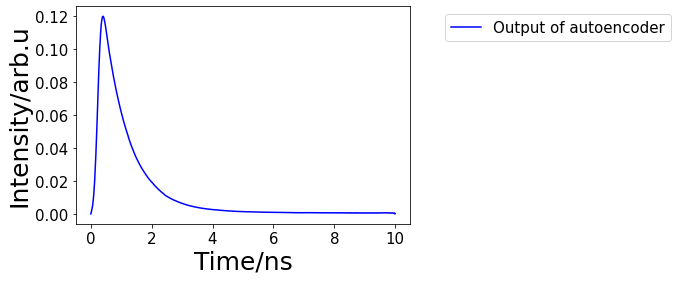

In [46]:
plt.plot(x1, y_pred_new[1,:]*0.01, label = 'Output of autoencoder', color = 'blue')
plt.xlabel('Time/ns', fontsize = 25 )
plt.ylabel('Intensity/arb.u', fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize = 20)
plt.legend(bbox_to_anchor=(1.8,1), loc='upper right', fontsize = 15)

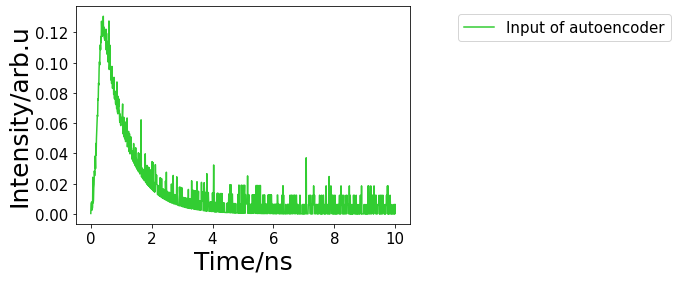

In [38]:
plt.plot(x1, noisy_X_val[1,:] , label = 'Input of autoencoder', color = 'limegreen')
plt.xlabel('Time/ns', fontsize = 25 )
plt.ylabel('Intensity/arb.u', fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize = 20)
plt.legend(bbox_to_anchor=(1.8,1), loc='upper right', fontsize = 15)

In [47]:
Predict_mean = sum(y_pred_new*0.01)/len(y_pred_new)

In [48]:
original_mean = sum(X_val)/len(X_val)

In [49]:
pred_std = np.std(y_pred_new*0.01)

In [50]:
original_std = np.std(X_val)

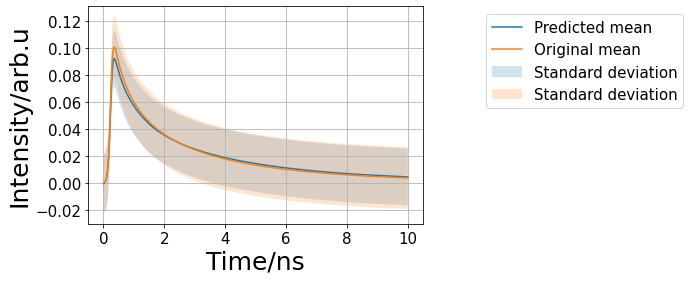

In [52]:
#plot mean, mean +std and mean-std


#plt.fill_between(x, y2, y3, color = 'red')
fig, ax = plt.subplots()
ax.plot(x1, Predict_mean, '-', label = 'Predicted mean') #this is for the middle dark line as a mean
ax.plot(x1,original_mean, '-', label = 'Original mean') #this is for the middle dark line as a mean
ax.fill_between(x1, Predict_mean-pred_std,Predict_mean+pred_std , alpha=0.2, label = 'Standard deviation') #alpha is for the color shade of the region
ax.fill_between(x1, original_mean-original_std,original_mean+original_std , alpha=0.2, label = 'Standard deviation')
plt.xlabel('Time/ns', fontsize = 25 )
plt.ylabel('Intensity/arb.u', fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(bbox_to_anchor=(1.8,1), loc='upper right', fontsize = 15)
plt.grid(True)

In [53]:
from sklearn.metrics import mean_squared_error
import math

In [54]:
mse = []
for i in range (2000):
    
    MSE = mean_squared_error(X_val[i,:], y_pred_new[i,:]*0.01)
    mse.append(MSE)

In [55]:
mse = np.array(mse)

In [56]:
df_mse = pd.DataFrame(mse)
df_mse.to_csv('7_19_mse_of_noisy_in_normal_out.csv',index=False)

In [ ]:
encoder = Model(inputs=inputs, outputs=c4)

In [ ]:
encoder.save('encoder_7_15_depthwise.h5')

In [ ]:
df_pred = pd.DataFrame(y_pred_new)
df_pred.to_csv('7_15_depthwise_predicted.csv',index=False)

In [ ]:
df_val = pd.DataFrame(X_val)
df_val.to_csv('7_15_depthwise_validation.csv',index=False)

In [ ]:
df_noisy_val = pd.DataFrame(noisy_X_val)
df_noisy_val.to_csv('7_15_depthwise_noisy_validation.csv',index=False)

In [ ]:
df_noisy_test = pd.DataFrame(noisy_X_test)
df_noisy_test.to_csv('7_15_depthwise_noisy_test.csv',index=False)

In [ ]:
df_test = pd.DataFrame(X_test)
df_test.to_csv('7_15_depthwise_test.csv',index=False)

In [ ]:
df_noisy_train = pd.DataFrame(noisy_X_train)
df_noisy_train.to_csv('7_15_depthwise_noisy_train.csv',index=False)

In [ ]:
df_train = pd.DataFrame(X_train)
df_train.to_csv('7_15_depthwise_train.csv',index=False)

In [36]:
model = load_model('u_net_short_denoiser_7_15_depthwise.h5')

In [41]:
encoder = load_model('encoder_7_15_depthwise.h5', compile = False)

In [42]:
# encode the train data
x_train_encode = encoder.predict(X_train)

188/188 [==============================] - 16s 6ms/step


In [43]:
# encode the test data
x_test_encode = encoder.predict(X_test)

63/63 [==============================] - 0s 5ms/step


In [44]:
#reshape for CNN training
x_train_encode_new =x_train_encode.reshape(6000,65536,1)

In [45]:
#reshape for CNN training
x_test_encode_new = x_test_encode.reshape(2000,65536,1)

In [46]:
##reshape for CNN training
x_val_encode = encoder.predict(X_val)

63/63 [==============================] - 0s 5ms/step


In [47]:
#reshape for CNN training
x_val_encode_new = x_val_encode.reshape(2000,65536,1)

In [48]:
# CNN architecture
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(65536,1)))
model1.add(MaxPooling1D(pool_size=2))

model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))

model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))

#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))



model1.add(Flatten())
model1.add(Dense(400, activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(6, activation = 'relu'))# change dense layer output everytime
opt = keras.optimizers.Adam(learning_rate=0.00001)
#model.compile(optimizer=opt, loss='mse', metrics=['mae'])
model1.compile(optimizer=opt, loss= 'mse', metrics=['mae'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 65534, 64)         256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 32767, 64)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 32765, 64)         12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 16382, 64)        0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 16380, 64)         12352     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 8190, 64)         0

In [49]:
model1.fit(x_train_encode_new, y_train, epochs =50, validation_data = [x_test_encode_new, y_test])

Epoch 1/50
188/188 [==============================] - 15s 67ms/step - loss: 0.1269 - mae: 0.2479 - val_loss: 0.0708 - val_mae: 0.1870
Epoch 2/50
188/188 [==============================] - 12s 64ms/step - loss: 0.0791 - mae: 0.1998 - val_loss: 0.0641 - val_mae: 0.1726
Epoch 3/50
188/188 [==============================] - 12s 65ms/step - loss: 0.0764 - mae: 0.1943 - val_loss: 0.0610 - val_mae: 0.1615
Epoch 4/50
188/188 [==============================] - 12s 65ms/step - loss: 0.0743 - mae: 0.1899 - val_loss: 0.0594 - val_mae: 0.1573
Epoch 5/50
188/188 [==============================] - 12s 65ms/step - loss: 0.0735 - mae: 0.1888 - val_loss: 0.0600 - val_mae: 0.1553
Epoch 6/50
188/188 [==============================] - 12s 65ms/step - loss: 0.0727 - mae: 0.1871 - val_loss: 0.0618 - val_mae: 0.1651
Epoch 7/50
188/188 [==============================] - 12s 65ms/step - loss: 0.0726 - mae: 0.1877 - val_loss: 0.0649 - val_mae: 0.1695
Epoch 8/50
188/188 [==============================] - 12s 65ms

In [50]:
model1.save('u_net_depthwise_normal_7_19_CNN.h5')

In [51]:
y_val_pred = model1.predict(np.reshape(x_val_encode_new,[2000,65536,1]))

63/63 [==============================] - 1s 19ms/step


In [52]:
df_y_val_pred = pd.DataFrame(y_val_pred)
df_y_val_pred.to_csv('7_19_y_val_pred_pls_con_of_noisy_in_normal_out_artificial.csv',index=False)

In [53]:
#separate a1, a2, a3, t1, t2, t3 values from y_test data
a1=Y_val[:,0]*100
a2=Y_val[:,1]*100
a3=Y_val[:,2]*100
t1=Y_val[:,3]*1.0
t2=Y_val[:,4]*4.0
t3=Y_val[:,5]*7.0

In [54]:
#separate all predicted values from yhat data set
a1_pred=y_val_pred[:,0]*100
a2_pred=y_val_pred[:,1]*100
a3_pred=y_val_pred[:,2]*100
t1_pred=y_val_pred[:,3]*1.0
t2_pred=y_val_pred[:,4]*4.0
t3_pred=y_val_pred[:,5]*7.0

In [55]:
#calculate the error
error_a1=a1-a1_pred
error_a2=a2-a2_pred
error_a3=a3-a3_pred
error_t1=t1-t1_pred
error_t2=t2-t2_pred
error_t3=t3-t3_pred

In [56]:
err_a1 = pd.DataFrame(error_a1, columns = ['a1'])
err_a2 = pd.DataFrame(error_a2, columns = ['a2'])
err_a3 = pd.DataFrame(error_a3, columns = ['a3'])
err_t1 = pd.DataFrame(error_t1, columns = ['t1'])
err_t2 = pd.DataFrame(error_t2, columns = ['t2'])
err_t3 = pd.DataFrame(error_t3, columns = ['t3'])

In [57]:
error = pd.concat ([err_a1, err_a2,err_a3, err_t1, err_t2  , err_t3 ], axis =1)

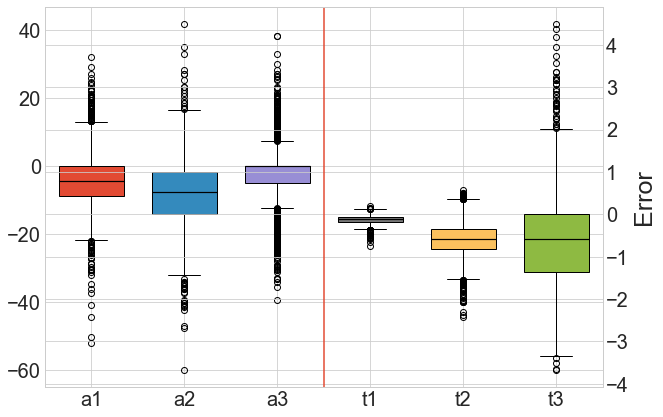

In [60]:
#boxplot plotting
plt.style.use('seaborn-whitegrid') 
#plt.style.use('ggplot')
df = pd.DataFrame({'a1': [err_a1], 'a2': [err_a2], 'a3': [err_a3], 't1': [err_t1], 't2': [err_t2], 't3': [err_t3]}, columns=['a1', 'a2','a3', 't1', 't2', 't3']) 
fig, ax1 = plt.subplots(figsize=(10, 7))
props = dict(widths=0.7,patch_artist=True)
medianprops = dict(linestyle='-', linewidth=1.2, color='black')
box1=ax1.boxplot(error[['a1','a2','a3']].values, positions=[0,1,2], **props,medianprops = medianprops) 
ax2 = ax1.twinx() 
box2=ax2.boxplot(error[['t1','t2','t3']].values,positions=[3,4,5], **props,medianprops = medianprops ) 
ax1.set_xticklabels(data_y.columns, fontsize=20) 
ax2.yaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
plt.axvline(x=2.5) 
plt.ylabel("Error", fontsize=25) 
for b in box1["boxes"]+box2["boxes"]:
    b.set_facecolor(next(ax1._get_lines.prop_cycler)["color"])
ax1.grid(True)
ax2.grid(True)

plt.show()

In [61]:
real_data_R =pd.read_excel(r'C:\Users\fe73yap\Downloads\Mean_decaytrace_R and G channel(2).xlsx',usecols ="A:AMM" )

In [62]:
real_data_R

,Sample name,folder name,Project ID,R_channel,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1017,Unnamed: 1018,Unnamed: 1019,Unnamed: 1020,Unnamed: 1021,Unnamed: 1022,Unnamed: 1023,Unnamed: 1024,Unnamed: 1025,Unnamed: 1026
0,210505_PosC01_200f,210505_Omeprazol_pre_treatment,607,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,210505_PosC02_200f,210505_Omeprazol_pre_treatment,607,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,210505_PosC03_200f,210505_Omeprazol_pre_treatment,607,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,210505_PosC04_200f,210505_Omeprazol_pre_treatment,607,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,210505_PosC05_200f,210505_Omeprazol_pre_treatment,607,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,96-Well_0.059µg-µl_Diclofenac_PosH02_200f,220120_Diclofenac_post_treatment,455,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382,96-Well_0.059µg-µl_Diclofenac_PosH03_200f,220120_Diclofenac_post_treatment,455,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383,96-Well_0.118µg-µl_Diclofenac_PosH04_200f,220120_Diclofenac_post_treatment,455,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384,96-Well_0.118µg-µl_Diclofenac_PosH05_200f,220120_Diclofenac_post_treatment,455,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
real_data_R=real_data_R.iloc[:,1:]
real_data_R


,R_channel,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 1017,Unnamed: 1018,Unnamed: 1019,Unnamed: 1020,Unnamed: 1021,Unnamed: 1022,Unnamed: 1023,Unnamed: 1024,Unnamed: 1025,Unnamed: 1026
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
real_data_R =pd.read_excel(r"C:\Users\fe73yap\Downloads\7_20_data_R_image.xlsx")

In [62]:
encoder = load_model('encoder_7_15_depthwise.h5', compile = False)

In [63]:
model1 = load_model('u_net_depthwise_normal_7_19_CNN.h5')

In [58]:

real_data_R = real_data_R.to_numpy()

In [59]:
real_data_R = preprocessing.normalize(real_data_R)

In [64]:
real_data_R_pad = encoder.predict(real_data_R)

1557/2048 [=====================>........] - ETA: 2s

ResourceExhaustedError: Graph execution error:

Detected at node 'model_1/conv1d_7/Conv1D' defined at (most recent call last):
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\ipykernel\kernelapp.py", line 667, in start
      self.io_loop.start()
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\ipykernel\ipkernel.py", line 345, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\fe73yap\AppData\Local\Temp/ipykernel_13020/1275922323.py", line 1, in <module>
      real_data_R_pad = encoder.predict(real_data_R)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\keras\engine\training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\keras\engine\training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\keras\engine\training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\keras\engine\training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
      return self(x, training=False)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\keras\layers\convolutional\base_conv.py", line 250, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "C:\Users\fe73yap\Anaconda3\envs\GPU2\lib\site-packages\keras\layers\convolutional\base_conv.py", line 225, in convolution_op
      return tf.nn.convolution(
Node: 'model_1/conv1d_7/Conv1D'
OOM when allocating tensor with shape[512,512,1,7] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_1/conv1d_7/Conv1D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_5353]

In [61]:
ypred_real_R = model1.predict(np.reshape(real_data_R_pad,[386,65536,1]))

NameError: name 'model1' is not defined

In [70]:
ypred_real_R

array([[0.7563146 , 0.        , 0.        , 0.24882355, 0.87060237,
        0.22678137],
       [0.7045858 , 0.06576925, 0.        , 0.20046078, 0.77681947,
        0.25467348],
       [0.81774485, 0.        , 0.        , 0.23689906, 0.9205053 ,
        0.23088074],
       ...,
       [0.85241824, 0.        , 0.        , 0.26307815, 0.9997487 ,
        0.21781848],
       [0.8914389 , 0.        , 0.        , 0.28248495, 1.0927744 ,
        0.2054264 ],
       [0.8380849 , 0.        , 0.        , 0.2505695 , 1.0005941 ,
        0.19328295]], dtype=float32)

In [71]:
real_lifetimes_R = pd.read_excel(r'C:\Users\fe73yap\Downloads\Morphotox_lifetimevalue_607and455.xlsx',usecols ="E:G")

In [72]:
real_lifetimes_R = real_lifetimes_R.to_numpy()

In [73]:
a1_pred_real=ypred_real_R[:,0]
a2_pred_real=ypred_real_R[:,1]
a3_pred_real=ypred_real_R[:,2]
t1_pred_real=ypred_real_R[:,3]
t2_pred_real=ypred_real_R[:,4]
t3_pred_real=ypred_real_R[:,5]

In [81]:
a1_R=real_lifetimes_R[:,0]
t1_R=real_lifetimes_R[:,1]
t2_R=real_lifetimes_R[:,2]

In [82]:
a2_R = a2_R = 1-a1_R
t3_R = np.zeros(386)
a3_R = np.zeros(386)

In [83]:
error1_a1=a1_R-a1_pred_real
error1_t1=t1_R-t1_pred_real
error1_t2=t2_R-t2_pred_real
error1_a2=a2_R-a2_pred_real
error1_a3=a3_R-a3_pred_real
error1_t3=t3_R-t3_pred_real

In [84]:
err1_a1 = pd.DataFrame(error1_a1, columns = ['a1'])
err1_a2 = pd.DataFrame(error1_a2, columns = ['a2'])
err1_a3 = pd.DataFrame(error1_a3, columns = ['a3'])
err1_t1 = pd.DataFrame(error1_t1, columns = ['t1'])
err1_t2 = pd.DataFrame(error1_t2, columns = ['t2'])
err1_t3 = pd.DataFrame(error1_t3, columns = ['t3'])

In [85]:
error1 = pd.concat ([err1_a1, err1_a2,err1_a3, err1_t1, err1_t2  ,err1_t3 ], axis =1)

In [86]:
error1 = error1.fillna(0)

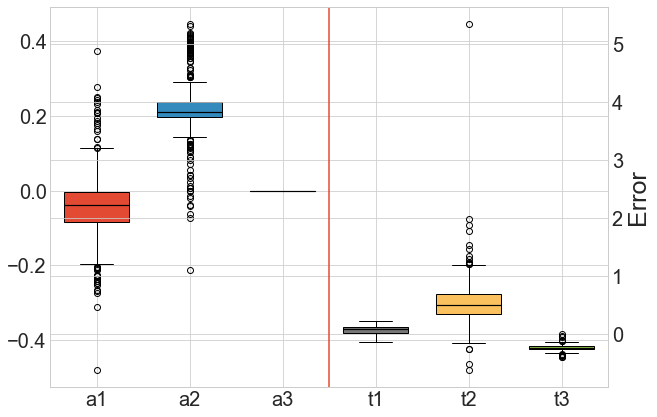

In [87]:
#boxplot plotting
plt.style.use('seaborn-whitegrid') 
#plt.style.use('ggplot') 
df = pd.DataFrame({'a1': [err1_a1], 'a2': [err1_a2], 'a3': [err1_a3], 't1': [err1_t1], 't2': [err1_t2], 't3': [err1_t3]}, columns=['a1', 'a2','a3', 't1', 't2', 't3']) 
fig, ax1 = plt.subplots(figsize=(10, 7))
props = dict(widths=0.7,patch_artist=True)
medianprops = dict(linestyle='-', linewidth=1.2, color='black')
box1=ax1.boxplot(error1[['a1','a2','a3']].values, positions=[0,1,2], **props,medianprops = medianprops) 
ax2 = ax1.twinx() 
box2=ax2.boxplot(error1[['t1','t2','t3']].values,positions=[3,4,5], **props,medianprops = medianprops ) 
ax1.set_xticklabels(data_y.columns, fontsize=20) 
ax2.yaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
plt.axvline(x=2.5) 
plt.ylabel("Error", fontsize=25) 
for b in box1["boxes"]+box2["boxes"]:
    b.set_facecolor(next(ax1._get_lines.prop_cycler)["color"])
ax1.grid(True)
ax2.grid(True)

plt.show()

In [88]:
df_error1 = pd.DataFrame(error1)
df_error1.to_csv('7_19_y_val_pred_CNN_con_of_noisy_in_normal_out_Rchannel.csv',index=False)

In [89]:
real_data_G =pd.read_excel(r'C:\Users\fe73yap\Downloads\Mean_decaytrace_R and G channel(2).xlsx',usecols ="AMO:BZX" )

In [90]:
real_data_G = real_data_G.to_numpy()

In [91]:
real_data_G =  preprocessing.normalize(real_data_G)

In [92]:
rl_data_G_pad = encoder.predict(real_data_G)

13/13 [==============================] - 0s 5ms/step


In [93]:
yhat_real_G = model1.predict(np.reshape(rl_data_G_pad,[386,65536,1]))

13/13 [==============================] - 0s 19ms/step


In [95]:
real_lifetimes_G = pd.read_excel(r'C:\Users\fe73yap\Downloads\Morphotox_lifetimevalue_607and455.xlsx',usecols ="H:J")

In [96]:
real_lifetimes_G = real_lifetimes_G.to_numpy()

In [94]:
yhat_real_G

array([[0.83100945, 0.        , 0.        , 0.2303723 , 0.964977  ,
        0.18924956],
       [0.7838138 , 0.        , 0.        , 0.2724333 , 0.91492605,
        0.19665033],
       [0.6778427 , 0.        , 0.        , 0.12213542, 0.9898033 ,
        0.24989079],
       ...,
       [0.71149826, 0.018395  , 0.        , 0.11894029, 0.9898882 ,
        0.17671503],
       [0.75357866, 0.0364602 , 0.        , 0.19859724, 0.9655905 ,
        0.1575067 ],
       [0.7328763 , 0.03521953, 0.        , 0.12162925, 1.0260293 ,
        0.16777857]], dtype=float32)

In [97]:
a1_pred_real_G=yhat_real_G[:,0]
a2_pred_real_G=yhat_real_G[:,1]
a3_pred_real_G=yhat_real_G[:,2]
t1_pred_real_G=yhat_real_G[:,3]
t2_pred_real_G=yhat_real_G[:,4]
t3_pred_real_G=yhat_real_G[:,5]

In [98]:
a1_G=real_lifetimes_G[:,0]
t1_G=real_lifetimes_G[:,1]
t2_G=real_lifetimes_G[:,2]

In [99]:
a2_G = 1-a1_G
t3_G = np.zeros(386)
a3_G = np.zeros(386)

In [100]:
error2_a1_G=a1_G-a1_pred_real_G
error2_t1_G=t1_G-t1_pred_real_G
error2_t2_G=t2_G-t2_pred_real_G
error2_a2_G=a2_G-a2_pred_real_G
error2_a3_G=a3_G-a3_pred_real_G
error2_t3_G=t3_G-t3_pred_real_G

In [101]:
err2_a1 = pd.DataFrame(error2_a1_G, columns = ['a1'])
err2_a2 = pd.DataFrame(error2_a2_G, columns = ['a2'])
err2_a3 = pd.DataFrame(error2_a3_G, columns = ['a3'])
err2_t1 = pd.DataFrame(error2_t1_G, columns = ['t1'])
err2_t2 = pd.DataFrame(error2_t2_G, columns = ['t2'])
err2_t3 = pd.DataFrame(error2_t3_G, columns = ['t3'])

In [102]:
error2 = pd.concat ([err2_a1, err2_a2,err2_a3, err2_t1, err2_t2  ,err2_t3 ], axis =1)

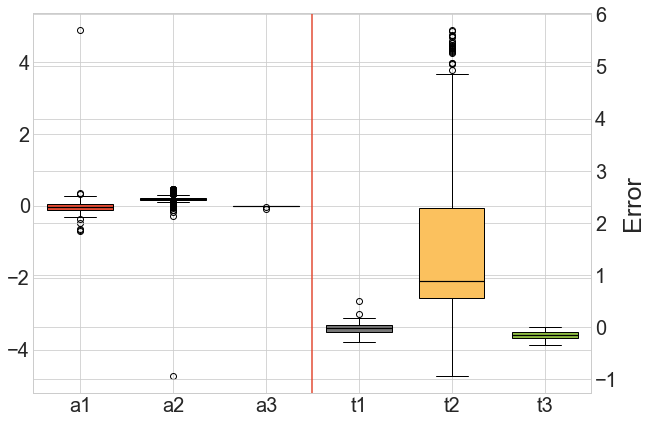

In [103]:
#boxplot plotting
plt.style.use('seaborn-whitegrid') 

df = pd.DataFrame({'a1': [err2_a1], 'a2': [err2_a2], 'a3': [err2_a3], 't1': [err2_t1], 't2': [err2_t2], 't3': [err2_t3]}, columns=['a1', 'a2','a3', 't1', 't2', 't3']) 
fig, ax1 = plt.subplots(figsize=(10, 7))
props = dict(widths=0.7,patch_artist=True)
medianprops = dict(linestyle='-', linewidth=1.2, color='black')
box1=ax1.boxplot(error2[['a1','a2','a3']].values, positions=[0,1,2], **props,medianprops = medianprops) 
ax2 = ax1.twinx() 
box2=ax2.boxplot(error2[['t1','t2','t3']].values,positions=[3,4,5], **props,medianprops = medianprops ) 
ax1.set_xticklabels(data_y.columns, fontsize=20) 
ax2.yaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
plt.axvline(x=2.5) 
plt.ylabel("Error", fontsize=25) 
for b in box1["boxes"]+box2["boxes"]:
    b.set_facecolor(next(ax1._get_lines.prop_cycler)["color"])
ax1.grid(True)
ax2.grid(True)

plt.show()

In [104]:
df_error2 = pd.DataFrame(error2)
df_error2.to_csv('7_19_y_val_pred_CNN_con_of_noisy_in_normal_out_Gchannel.csv',index=False)

In [ ]:
plt.style.use('seaborn-whitegrid') 
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch', fontsize = 25)
plt.ylabel('Loss',fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize = 20)
plt.grid(True)
plt.show()

In [ ]:
plt.xlabel ('Time/ ns', fontsize = 25)
plt.ylabel ('Intensity/ arb.u', fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:
plt.style.use('seaborn-whitegrid') 
plt.plot(history.history['loss'][200:], label='train')
plt.plot(history.history['val_loss'][200:], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
history.history

In [ ]:
#save
f = open('history_6_22_1.pckl', 'wb')
pickle.dump(history.history, f)
f.close()


In [ ]:
# retrieve:    
#f = open('history.pckl', 'rb')
#history = pickle.load(f)
#f.close()

In [ ]:
#model = load_model('u_net_short_denoiser_6_16.h5')

In [ ]:
y_pred = model.predict(noisy_X_val, verbose=1)

In [ ]:
y_pred.shape

In [ ]:
y_pred_new = y_pred.reshape(2000,1024)

In [ ]:
y_pred_new

In [ ]:
y_pred_new.shape

In [ ]:
plt.plot(x1, y_pred_new[2,:])

In [ ]:
x1 = np.linspace(0,10, num = 1024)

In [ ]:
plt.plot(x1,y_pred_new[100,:]*0.01)
#plt.plot(x1, X_train[2,:])
plt.plot(x1, X_val[100,:])

In [ ]:
y1_pred = model.predict(noisy_X_train, verbose=1)

In [ ]:
y1_pred = y1_pred.reshape(-1,1024)

In [ ]:
plt.plot(x1, y1_pred[1,:]*0.01)
plt.plot(x1, X_train[1,:])

In [ ]:
#pp = PdfPages ('U_net_denoiser_adam_1skip_2dense_leakyrelu_longepoch.pdf')
for i in range (2000):
    
    plt.plot(x1, y_pred_new[i,:]*0.01, label = 'Reconstructed')
    plt.plot(x1, X_val[i,:] , label = 'Test')
    plt.xlabel('Time/ns')
    plt.ylabel('Intensity/arb.u')
    plt.legend()
    plt.show()
#pp.close()

In [ ]:
from sklearn.metrics import mean_squared_error
true = X_val
predict = y_pred_new*0.01
rmse = mean_squared_error(true, predict, squared=False)

In [ ]:
rmse

In [ ]:
from skimage.metrics import structural_similarity as ssim

In [ ]:
ssim_none = ssim(true, predict)

In [ ]:
ssim_none

In [ ]:
######################################################################################################################

In [ ]:
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(16384,1)))
model1.add(MaxPooling1D(pool_size=2))

model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))

model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))

#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))



model1.add(Flatten())
model1.add(Dense(400, activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(6, activation = 'relu'))# change dense layer output everytime
opt = keras.optimizers.Adam(learning_rate=0.00001)
#model.compile(optimizer=opt, loss='mse', metrics=['mae'])
model1.compile(optimizer=opt, loss= 'mse', metrics=['mae'])
print(model1.summary())